<a href="https://colab.research.google.com/github/pranamyasin/projects/blob/main/Multiclassification_football.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from numpy.random import seed

In [ ]:
data_football = pd.read_csv("/content/drive/MyDrive/collab/football_data.csv")
data_football.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
data_football.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [ ]:
data_football.isnull().sum()     #alot of missing values are present

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [ ]:
data_football.shape   #18207 rows and 89 columns are present

(18207, 89)

In [ ]:
data_football.columns        #main target variable is position

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [ ]:
data_football['Position'].value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [ ]:
data_football['Position'].isnull().sum()     # 60 missing values are present in our target column

60

In [ ]:
na=pd.notnull(data_football['Position'])     #since we dont need any missing value in target column
data_football=data_football[na]

In [ ]:
data_football['Position'].isnull().sum()

0

In [ ]:
data_football= data_football[['Position','Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling','Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
                              'Acceleration','SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower','Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                              'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure','Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                               'GKKicking', 'GKPositioning', 'GKReflexes']]          #columns required for target value consideration

In [ ]:
data_football.head()

,Position,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,RF,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,ST,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,LW,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,GK,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,RCM,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [ ]:
# dividing players in certain groups
forward_players = ['ST','LW','RW','LF','RF','LS','RS','CF']
midfield_players = ['CM','RCM','LCM','CDM','RDM','LDM','CAM','LAM','RAM','RM','LM']
defender_player = ['CB','RCB','LCB','LWB','RWB','LB','RB']

In [ ]:
data_football['Position']=data_football['Position'].apply(lambda x:0 if x=="GK" 
                                else 1 if x in forward_players 
                                else 2 if x in midfield_players  
                                else 3 if  x in defender_player
                                else x) 

In [ ]:
data_football.head()

,Position,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,1,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,1,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,1,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,2,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [ ]:
data_football['Position'].value_counts()

2    6838
3    5866
1    3418
0    2025
Name: Position, dtype: int64

In [ ]:
y_cat = tf.keras.utils.to_categorical(data_football['Position'].values)                # converting the encoded o/p to categorical variable
y_cat

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [ ]:
x=data_football.iloc[:,1:].values

In [ ]:
y=data_football['Position'].values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y_cat,random_state=0,stratify=y_cat)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(13610, 33)
(4537, 33)


In [ ]:
sc=StandardScaler() 
x_train =sc.fit_transform(x_train)
x_test =sc.fit_transform(x_test)

In [ ]:
x_train[0].shape

(33,)

In [ ]:
#keras model
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16,input_shape=(33,),activation='relu')) 
model.add(tf.keras.layers.Dropout(0.3))  
model.add(tf.keras.layers.Dense(8,activation='relu'))
model.add(tf.keras.layers.Dense(4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                544       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_16 (Dense)            (None, 8)                 136       
                                                                 
 dense_17 (Dense)            (None, 4)                 36        
                                                                 
Total params: 716
Trainable params: 716
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',metrics=['accuracy'],loss=tf.keras.losses.CategoricalCrossentropy())

In [ ]:
model_fit = model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test),
                      callbacks= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30))

Epoch 1/100
426/426 [==============================] - 2s 3ms/step - loss: 0.7022 - accuracy: 0.6993 - val_loss: 0.4068 - val_accuracy: 0.8193
Epoch 2/100
426/426 [==============================] - 1s 2ms/step - loss: 0.4352 - accuracy: 0.8115 - val_loss: 0.3480 - val_accuracy: 0.8499
Epoch 3/100
426/426 [==============================] - 1s 3ms/step - loss: 0.3948 - accuracy: 0.8329 - val_loss: 0.3255 - val_accuracy: 0.8607
Epoch 4/100
426/426 [==============================] - 1s 2ms/step - loss: 0.3740 - accuracy: 0.8453 - val_loss: 0.3119 - val_accuracy: 0.8680
Epoch 5/100
426/426 [==============================] - 1s 2ms/step - loss: 0.3642 - accuracy: 0.8467 - val_loss: 0.3094 - val_accuracy: 0.8700
Epoch 6/100
426/426 [==============================] - 1s 3ms/step - loss: 0.3575 - accuracy: 0.8505 - val_loss: 0.3034 - val_accuracy: 0.8719
Epoch 7/100
426/426 [==============================] - 1s 2ms/step - loss: 0.3556 - accuracy: 0.8553 - val_loss: 0.3088 - val_accuracy: 0.8669

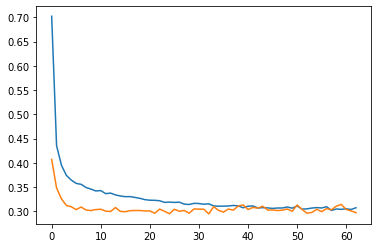

In [ ]:
pd.Series(model_fit.history['loss']).plot(kind='line')
pd.Series(model_fit.history['val_loss']).plot(kind='line') 

In [ ]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([0, 3, 0, ..., 2, 3, 0])

In [ ]:
y_test=np.argmax(y_test,axis=1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       506
           1       0.91      0.70      0.79       854
           2       0.80      0.90      0.85      1710
           3       0.92      0.91      0.92      1467

    accuracy                           0.88      4537
   macro avg       0.91      0.88      0.89      4537
weighted avg       0.88      0.88      0.87      4537



The accuracy of model is 88%